In [2]:
!pip install google-cloud google-cloud-bigquery google-auth

In [69]:
import pandas as pd
import re
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
!pip install db-dtypes

In [5]:
from google.auth import load_credentials_from_file
from google.cloud.bigquery import Client

In [10]:
# credentials, project_id = load_credentials_from_file("/Users/thyneminhtetaungaung/Music Project All file /service_account.json")
credentials, project_id = load_credentials_from_file("/Users/ileniamolinacasanovas/Hyper Island/group sprint/service_account.json")

In [11]:
credentials

In [12]:
type(credentials)

google.oauth2.service_account.Credentials

In [13]:
project_id

'da26-python'

In [14]:
# load data from BigQuery
client = Client(
    project = project_id,
    credentials = credentials
)

In [15]:
type(client)

google.cloud.bigquery.client.Client

In [16]:
query = "SELECT * FROM `da26-python.music_data.tracks`"

In [17]:
load_job = client.query(query)

In [18]:
data = load_job.to_dataframe()

In [19]:
def load_data(table):
    query = f"SELECT * FROM `da26-python.music_data.{table}`"
    load_job = client.query(query)
    data = load_job.to_dataframe()
    return data

In [20]:
artists = load_data("artists")

In [21]:
artists.head()

,artist_id,name,popularity,followers
0,13UwRaADQI0yTqjPBDkk6d,J-Shin (Featuring LaTocha Scott of Xscape),0,253
1,2LmsYeN3MzzZ9zhuZhNyqO,A*Teens,0,10
2,5Q25oFANw7zA3kD2DPaJ8D,The 2000s Karaoke Band,0,26
3,7u7ORV6MVjId1jfJwMdakL,2000s Karaoke Band,0,27
4,0LyfQWJT6nXafLPZqxe9Of,Various Artists,0,2542450


In [22]:
audio_features = load_data("audio_features")

In [23]:
audio_features.head(10)

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3lZpvPprN56RWqDqrKy9vl,0.00,0.532,3.0,-7.447,1.0,0.000,0.976,0.000000,0.000,0.0000,0.000,0.0
8,7rLDARtJALM7QdiJDMXW7m,0.25,0.215,8.0,-13.676,0.0,0.037,0.632,0.071700,0.401,0.0746,174.824,3.0
9,4TbNLKRLKlxZDlS0pu7Lsy,0.25,0.136,10.0,-12.162,1.0,0.037,0.673,0.000157,0.107,0.0981,118.086,4.0


In [24]:
audio_features.sample(10)

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
4277,09UUDUFaudMcUkocm2iqR8,0.350,0.787,2.0,-6.081,1.0,0.0327,0.00684,0.000940,0.0827,0.226,74.593,4.0
5439,0O7mJ0noFBLn8MMUJrFaF1,0.884,0.783,1.0,-2.388,1.0,0.2940,0.07440,0.000000,0.1200,0.929,124.052,4.0
8470,5DI9jxTHrEiFAhStG7VA8E,0.793,0.524,8.0,-7.827,1.0,0.1560,0.03190,0.000000,0.1560,0.579,86.325,4.0
2791,4BHzHISX21PYwGXiBEUQ70,0.808,0.772,4.0,-5.719,0.0,0.0638,0.04130,0.000001,0.1800,0.471,161.941,4.0
8456,3CNbrXrUrEARw8zeKNCdYo,0.793,0.450,2.0,-3.012,1.0,0.0392,0.54200,0.000000,0.1910,0.870,157.937,3.0
10714,4H7WNRErSbONkM06blBoGc,0.506,0.480,5.0,-5.418,1.0,0.0266,0.44900,0.000000,0.1470,0.351,86.042,4.0
4742,4dfvajW0PS2LG2kHFig8vy,0.801,0.537,11.0,-10.595,1.0,0.4600,0.02000,0.000037,0.1110,0.433,89.064,4.0
1724,4jCodMLVA5tV5MhPrspTfV,0.636,0.896,0.0,-3.755,1.0,0.0989,0.17500,0.000000,0.1120,0.319,102.074,4.0
3282,4c7LkE1lSNj3RR4cZo0jEi,0.772,0.563,11.0,-8.188,0.0,0.4520,0.01070,0.000000,0.3040,0.521,160.064,4.0
2656,5Ur3FZ0DkRPDwXdyjmx64i,0.564,0.902,2.0,-4.142,1.0,0.1400,0.35000,0.000000,0.3070,0.444,141.099,4.0


In [25]:
audio_features.tail(10)

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
10773,1wva1IlWLDNLgwipUWcmjy,0.756,0.829,11.0,-3.973,1.0,0.0682,0.00300,0.000035,0.0578,0.504,120.163,4.0
10774,5Odq8ohlgIbQKMZivbWkEo,0.881,0.592,2.0,-4.898,1.0,0.0324,0.61900,0.000013,0.0901,0.719,101.058,4.0
10775,3wMUvT6eIw2L5cZFG1yH9j,0.881,0.663,2.0,-6.822,1.0,0.0827,0.00683,0.000000,0.1420,0.586,81.374,4.0
10776,0GR7iJLhj80KD5LkA14ZRn,0.881,0.546,2.0,-7.566,1.0,0.1200,0.00296,0.000005,0.2260,0.276,140.032,4.0
10777,7nDtDxsKJ3fho8xEmU65JJ,0.881,0.830,7.0,-4.563,1.0,0.1720,0.01440,0.007710,0.0626,0.765,98.793,4.0
10778,2Ec33AVlkTTq8BHFgBTdQs,0.881,0.457,7.0,-8.191,0.0,0.1560,0.03270,0.000000,0.2310,0.296,136.970,4.0
10779,3KixNgUEaDtrKJVzdqjU5q,0.881,0.636,7.0,-4.629,1.0,0.2870,0.00606,0.000000,0.1110,0.715,163.949,4.0
10780,4ANFPo7dzs2DdPuONXC9bp,0.881,0.549,10.0,-5.589,1.0,0.2720,0.00910,0.000000,0.1370,0.202,144.019,4.0
10781,5wfllwdjglyQislkskYLBv,0.881,0.442,11.0,-6.278,0.0,0.0651,0.48000,0.000009,0.1200,0.803,138.014,4.0
10782,3EikYy40GMSp8l5mDV6IQo,0.881,0.623,1.0,-9.662,1.0,0.1190,0.25700,0.000002,0.0964,0.744,88.953,4.0


In [26]:
chart_positions = load_data("chart_positions")
chart_positions.head(10)

,chart_week,list_position,track_id
0,2021-07-10,42,000TJlEJQ3nafsm1hBWpoj
1,2003-07-19,60,003FTlCpBTM4eSqYSWPv4H
2,2003-07-26,60,003FTlCpBTM4eSqYSWPv4H
3,2003-08-02,64,003FTlCpBTM4eSqYSWPv4H
4,2003-07-12,66,003FTlCpBTM4eSqYSWPv4H
5,2003-08-09,66,003FTlCpBTM4eSqYSWPv4H
6,2003-06-28,67,003FTlCpBTM4eSqYSWPv4H
7,2003-07-05,67,003FTlCpBTM4eSqYSWPv4H
8,2003-06-21,71,003FTlCpBTM4eSqYSWPv4H
9,2003-08-16,85,003FTlCpBTM4eSqYSWPv4H


In [27]:
tracks = load_data("tracks")
tracks.head(10)

,track_id,name,duration_ms,release_date,album_type,explicit
0,5CMVGP24paZIukljDj0iWc,Jingle Bells (with The Ken Lane Singers),156666,1945,compilation,False
1,25leEEaz1gIpp7o21Fqyjo,Here Comes Santa Claus (Right Down Santa Claus...,150266,1947,album,False
2,1dtIaSlyrLI04sqYa8nLyN,Rudolph the Red-Nosed Reindeer,186733,1947,album,False
3,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),192160,1962,album,False
4,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),192160,1962,album,False
5,4PS1e8f2LvuTFgUs1Cn3ON,The Christmas Song (Merry Christmas To You),192160,1962,album,False
6,5ASM6Qjiav2xPe7gRkQMsQ,Sleigh Ride,181266,1963,compilation,False
7,46pF1zFimM582ss1PrMy68,Christmas (Baby Please Come Home),166453,1963,compilation,False
8,7uyivkbdc8iH8wyBGBhlXV,One More Chance,229000,1979,compilation,False
9,2uX5f3x2cObov0iDAPln4o,Song of the South,190800,1980,album,False


In [28]:
tracks_artists_mapping = load_data("tracks_artists_mapping")
tracks_artists_mapping.head(10)

,artist_id,track_id
0,artist_id,track_id
1,00FQb4jTyendYWaN8pK0wa,4zmKGsrXjLmljb5fTaBTot
2,00FQb4jTyendYWaN8pK0wa,6GGtHZgBycCgGBUhZo81xe
3,00FQb4jTyendYWaN8pK0wa,22DH8NChecsgPxDjA4pqer
4,00FQb4jTyendYWaN8pK0wa,7JVNRVPeXFAOdMrxOHNjVv
5,00FQb4jTyendYWaN8pK0wa,24jvD83UgLmrdGjhWTFslY
6,00FQb4jTyendYWaN8pK0wa,2nMeu6UenVvwUktBCpLMK9
7,00FQb4jTyendYWaN8pK0wa,6PUIzlqotEmPuBfjbwYWOB
8,00FQb4jTyendYWaN8pK0wa,5Y6nVaayzitvsD5F7nr3DV
9,00FQb4jTyendYWaN8pK0wa,4VSg5K1hnbmIg4PwRdY6wV


In [29]:
audio_features.shape

(10783, 13)

In [30]:
audio_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10783 entries, 0 to 10782
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          10776 non-null  object 
 1   danceability      10776 non-null  float64
 2   energy            10776 non-null  float64
 3   key               10776 non-null  float64
 4   loudness          10776 non-null  float64
 5   mode              10776 non-null  float64
 6   speechiness       10776 non-null  float64
 7   acousticness      10776 non-null  float64
 8   instrumentalness  10776 non-null  float64
 9   liveness          10776 non-null  float64
 10  valence           10776 non-null  float64
 11  tempo             10776 non-null  float64
 12  time_signature    10776 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.1+ MB


In [31]:
audio_features.columns

Index(['track_id', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [32]:
# checking null data (for all column)
audio_features.loc[audio_features.isnull().any(axis = 1)]

,track_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# drop NA for 7 rows 
audio_features.dropna(inplace = True)

In [34]:
# Getting new dataset_without NA
audio_features.reset_index(drop = True, inplace = True)

In [35]:
# change data type from floats to int for three column - Key, Mode, Time-Signature
audio_features["key"]= audio_features["key"].astype(int)
audio_features["mode"]= audio_features["mode"].astype(int)
audio_features["time_signature"]= audio_features["time_signature"].astype(int)


In [36]:
#Cleaning Tracks file / Check info first 
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11070 entries, 0 to 11069
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_id      11070 non-null  object 
 1   name          11070 non-null  object 
 2   duration_ms   11070 non-null  Int64  
 3   release_date  11070 non-null  object 
 4   album_type    11070 non-null  object 
 5   explicit      11070 non-null  boolean
dtypes: Int64(1), boolean(1), object(4)
memory usage: 465.0+ KB


In [37]:
#checking date and count value in Release_date 
tracks["release_date"].value_counts()

release_date
2013-01-01    153
2011-01-01    130
2009-01-01    127
2006-01-01    125
2010-01-01    116
             ... 
2013-11-03      1
2013-10-28      1
2013-10-25      1
2013-10-21      1
2024-09-19      1
Name: count, Length: 2440, dtype: int64

In [38]:
# Checking Unique Date format 
tracks["release_date"].unique()

array(['1945', '1947', '1962', ..., '2024-09-12', '2024-09-14',
       '2024-09-19'], dtype=object)

In [39]:
# Changing datetime format. However, It is the same. 
#  tracks["release_date"] = pd.to_datetime(tracks["release_date"], errors = "coerce")

In [40]:
# Checking Null data/ There is no null. 
tracks.isnull().sum()

track_id        0
name            0
duration_ms     0
release_date    0
album_type      0
explicit        0
dtype: int64

In [41]:
# release date data to year colum
def func(item):
    day = item.split("-")
    if len(day) == 1:
        return int(day[0]),0,0
    elif len(day) == 2:
        return int(day[0]), int(day[1]), 0
    else:
        return int(day[0]), int(day[1]), int(day[2])

tracks[["year","month","day"]] = tracks["release_date"].apply(lambda x:pd.Series(func(x)))
print(tracks[["year","month","day"]])

       year  month  day
0      1945      0    0
1      1947      0    0
2      1947      0    0
3      1962      0    0
4      1962      0    0
...     ...    ...  ...
11065  2024     10    1
11066  2024     10    1
11067  2024     10    1
11068  2024     10    4
11069  2024     10   11

[11070 rows x 3 columns]


In [42]:
#Check data info again 
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11070 entries, 0 to 11069
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_id      11070 non-null  object 
 1   name          11070 non-null  object 
 2   duration_ms   11070 non-null  Int64  
 3   release_date  11070 non-null  object 
 4   album_type    11070 non-null  object 
 5   explicit      11070 non-null  boolean
 6   year          11070 non-null  int64  
 7   month         11070 non-null  int64  
 8   day           11070 non-null  int64  
dtypes: Int64(1), boolean(1), int64(3), object(4)
memory usage: 724.4+ KB


In [43]:
tracks.to_csv("tracks_update.csv")

In [44]:
tracks.month.loc[tracks.month==0]


0       0
1       0
2       0
3       0
4       0
       ..
6914    0
6915    0
6916    0
6917    0
6918    0
Name: month, Length: 416, dtype: int64

In [45]:
tracks.year.loc[tracks.year!=0]

0        1945
1        1947
2        1947
3        1962
4        1962
         ... 
11065    2024
11066    2024
11067    2024
11068    2024
11069    2024
Name: year, Length: 11070, dtype: int64

In [46]:
tracks.day.loc[tracks.day!=0]

349       1
350       1
351       1
352      15
353       2
         ..
11065     1
11066     1
11067     1
11068     4
11069    11
Name: day, Length: 10652, dtype: int64

In [47]:
# artists data cleaning/ checking info first / nothing need to change 
artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3108 entries, 0 to 3107
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   artist_id   3108 non-null   object
 1   name        3108 non-null   object
 2   popularity  3108 non-null   Int64 
 3   followers   3108 non-null   Int64 
dtypes: Int64(2), object(2)
memory usage: 103.3+ KB


In [48]:
# tracks_artists_mapping data cleaning/ checking info first / nothing need to change 
tracks_artists_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15048 entries, 0 to 15047
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   artist_id  15048 non-null  object
 1   track_id   15048 non-null  object
dtypes: object(2)
memory usage: 235.3+ KB


In [49]:
# chart_positions data cleaning/ checking info first / nothing need to change 
chart_positions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129305 entries, 0 to 129304
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   chart_week     129305 non-null  dbdate
 1   list_position  129305 non-null  Int64 
 2   track_id       129305 non-null  object
dtypes: Int64(1), dbdate(1), object(1)
memory usage: 3.1+ MB


In [50]:
# Merge Data for all data sets. 
master_data = tracks.merge(tracks_artists_mapping, on="track_id").merge(artists, on="artist_id").merge(chart_positions, on="track_id").merge(audio_features, on="track_id")

In [51]:
# Checking dublicate/ how many
master_data.duplicated().sum()

12837

In [52]:
#remove dublicate from combine data
master_data.drop_duplicates(inplace=True)
master_data.reset_index(inplace=True)

In [53]:
# Checking combine dataset information 
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175449 entries, 0 to 175448
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             175449 non-null  int64  
 1   track_id          175449 non-null  object 
 2   name_x            175449 non-null  object 
 3   duration_ms       175449 non-null  Int64  
 4   release_date      175449 non-null  object 
 5   album_type        175449 non-null  object 
 6   explicit          175449 non-null  boolean
 7   year              175449 non-null  int64  
 8   month             175449 non-null  int64  
 9   day               175449 non-null  int64  
 10  artist_id         175449 non-null  object 
 11  name_y            175449 non-null  object 
 12  popularity        175449 non-null  Int64  
 13  followers         175449 non-null  Int64  
 14  chart_week        175449 non-null  dbdate 
 15  list_position     175449 non-null  Int64  
 16  danceability      17

In [54]:
# Checking null data in combine data. 
master_data.loc[master_data.isnull().any(axis = 1)]

,index,track_id,name_x,duration_ms,release_date,album_type,explicit,year,month,day,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature


In [55]:
master_data.rename(columns={'name_x': 'track_name', 'name_y': 'artist_name'}, inplace=True)


In [56]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175449 entries, 0 to 175448
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             175449 non-null  int64  
 1   track_id          175449 non-null  object 
 2   track_name        175449 non-null  object 
 3   duration_ms       175449 non-null  Int64  
 4   release_date      175449 non-null  object 
 5   album_type        175449 non-null  object 
 6   explicit          175449 non-null  boolean
 7   year              175449 non-null  int64  
 8   month             175449 non-null  int64  
 9   day               175449 non-null  int64  
 10  artist_id         175449 non-null  object 
 11  artist_name       175449 non-null  object 
 12  popularity        175449 non-null  Int64  
 13  followers         175449 non-null  Int64  
 14  chart_week        175449 non-null  dbdate 
 15  list_position     175449 non-null  Int64  
 16  danceability      17

In [57]:
master_data.columns


Index(['index', 'track_id', 'track_name', 'duration_ms', 'release_date',
       'album_type', 'explicit', 'year', 'month', 'day', 'artist_id',
       'artist_name', 'popularity', 'followers', 'chart_week', 'list_position',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')

In [58]:
# Drop Index Column
master_data.drop(columns= "index", inplace = True)
master_data = master_data.reset_index(drop=True)

In [59]:
# Checking duplicate before analysis Audio Features
master_data.duplicated().sum()

0

# Popular_Audiofeatures Analysis 

## Identifying Live-Event-Friendly Tracks

In [77]:
#checking top track with popularity 
master_data.groupby("track_name").popularity.max().sort_values(ascending = False).head(30)

track_name
"Slut!" (Taylor's Version) (From The Vault)                                             100
Starlight (Taylor's Version)                                                            100
Haunted (Taylor's Version)                                                              100
Haunted                                                                                 100
Christmas Tree Farm                                                                     100
Christmas Tree Farm (Old Timey Version)                                                 100
The Albatross                                                                           100
The Alchemy                                                                             100
The Archer                                                                              100
The Black Dog                                                                           100
The Bolter                                                           

In [239]:
# Which tracks with high popularity scores also have high liveness, energy, and danceability values, making them suitable for live performances?
master_data.groupby(["track_name","artist_name"])[["popularity","liveness","valence","danceability"]].mean().sort_values(ascending = False,by = ["valence","liveness","danceability","popularity"]).head(20)

popularity  \
track_name                                         artist_name                      
Mmm Yeah (feat. Pitbull)                           Pitbull                   86.0   
                                                   Austin Mahone             57.0   
Here Comes Santa Claus (Right Down Santa Claus ... Gene Autry                48.0   
El Pájaro Amarillo                                 Los 50 De Joselito        48.0   
Bahm Bahm                                          Nicki Minaj               87.0   
La Camisa Negra                                    Juanes                    77.0   
Wait A Minute                                      Timbaland                 79.0   
                                                   The Pussycat Dolls        70.0   
Give It 2 Me                                       Madonna                   81.0   
Just A Little While                                Janet Jackson             67.0   
Goodbye                                            Jagged Edge               63.0   
Little Saint Nick - 1991 Remix                     The Beach Boys            73.0   
The Bad Touch                                      Bloodhound Gang           63.0   
Lo Que Me Gusta A Mi                               Juanes                    77.0   
Johnny B. Goode                                    Chuck Berry               68.0   
Culo                                               Pitbull                   86.0   
                                                   Lil Jon                   75.0   
Family Affair                                      Mary J. Blige             72.0   
Indica Badu                                        Wiz Khalifa               83.0   
                                                   Logic                     75.0   

                                                                       liveness  \
track_name                                         artist_name                    
Mmm Yeah (feat. Pitbull)                           Pitbull               0.2680   
                                                   Austin Mahone         0.2680   
Here Comes Santa Claus (Right Down Santa Claus ... Gene Autry            0.2750   
El Pájaro Amarillo                                 Los 50 De Joselito    0.0563   
Bahm Bahm                                          Nicki Minaj           0.0312   
La Camisa Negra                                    Juanes                0.0556   
Wait A Minute                                      Timbaland             0.3230   
                                                   The Pussycat Dolls    0.3230   
Give It 2 Me                                       Madonna               0.1430   
Just A Little While                                Janet Jackson         0.0832   
Goodbye                                            Jagged Edge           0.0532   
Little Saint Nick - 1991 Remix                     The Beach Boys        0.0512   
The Bad Touch                                      Bloodhound Gang       0.1230   
Lo Que Me Gusta A Mi                               Juanes                0.0788   
Johnny B. Goode                                    Chuck Berry           0.3070   
Culo                                               Pitbull               0.1410   
                                                   Lil Jon               0.1410   
Family Affair                                      Mary J. Blige         0.0863   
Indica Badu                                        Wiz Khalifa           0.0839   
                                                   Logic                 0.0839   

                                                                       valence  \
track_name                                         artist_name                   
Mmm Yeah (feat. Pitbull)                           Pitbull               0.976   
                                                   Austin Mahone         0.976   
Here Comes Santa Claus (Right Down Santa Clau

In [235]:
# Which tracks with high popularity scores also have high danceability values, making them suitable for live performances?
master_data.groupby(["track_name","artist_name"])[["popularity","danceability"]].mean().sort_values(ascending = False,by = ["danceability","popularity"]).head(20)

popularity  \
track_name                           artist_name                     
Ice Ice Baby (Glee Cast Version)     Glee Cast                70.0   
Uno                                  Ambjaay                  38.0   
Bad Bad Bad (feat. Lil Baby)         Lil Baby                 87.0   
                                     Young Thug               85.0   
In da Wind                           CeeLo Green              66.0   
                                     Trick Daddy              58.0   
                                     Big Boi                  54.0   
Make Love                            Nicki Minaj              87.0   
                                     Gucci Mane               77.0   
Johnny Dang (with Paul Wall & DRODi) That Mexican OT          73.0   
                                     Paul Wall                65.0   
                                     DRODi                    59.0   
Baby (Lil Baby feat. DaBaby)         Lil Baby                 87.0   
                                     DaBaby                   79.0   
                                     Quality Control          64.0   
Drip (feat. Migos)                   Cardi B                  81.0   
                                     Migos                    77.0   
SexyBack (feat. Timbaland)           Justin Timberlake        83.0   
                                     Timbaland                79.0   
Think U The Shit (Fart)              Ice Spice                76.0   

                                                        danceability  
track_name                           artist_name                      
Ice Ice Baby (Glee Cast Version)     Glee Cast                 0.980  
Uno                                  Ambjaay                   0.978  
Bad Bad Bad (feat. Lil Baby)         Lil Baby                  0.974  
                                     Young Thug                0.974  
In da Wind                           CeeLo Green               0.974  
                                     Trick Daddy               0.974  
                                     Big Boi                   0.974  
Make Love                            Nicki Minaj               0.972  
                                     Gucci Mane                0.972  
Johnny Dang (with Paul Wall & DRODi) That Mexican OT           0.971  
                                     Paul Wall                 0.971  
                                     DRODi                     0.971  
Baby (Lil Baby feat. DaBaby)         Lil Baby                  0.970  
                                     DaBaby                    0.970  
                                     Quality Control           0.970  
Drip (feat. Migos)                   Cardi B                   0.968  
                                     Migos                     0.968  
SexyBack (feat. Timbaland)           Justin Timberlake         0.967  
                                     Timbaland                 0.967  
Think U The Shit (Fart)              Ice Spice                 0.966

In [236]:
# Which tracks with high popularity scores also have high danceability values, making them suitable for live performances?
master_data.groupby(["track_name","artist_name"])[["popularity","liveness"]].mean().sort_values(ascending = False,by = ["liveness","popularity"]).head(20)

popularity  \
track_name                                         artist_name                   
Freedom                                            Paul McCartney         73.0   
Outside (feat. Fred Durst) - Family Values Live... Aaron Lewis            59.0   
                                                   Fred Durst             53.0   
Sgt. Pepper's Lonely Hearts Club Band - Live at... U2                     78.0   
The Prayer - LIVE Duet with Josh Groban            Céline Dion            77.0   
Sgt. Pepper's Lonely Hearts Club Band - Live at... Paul McCartney         73.0   
The Prayer - LIVE Duet with Josh Groban            Josh Groban            60.0   
Ai Se Eu Te Pego                                   Michel Teló            60.0   
All My Ex's Live In Texas - Live                   George Strait          75.0   
                                                   Jason Aldean           75.0   
                                                   Alan Jackson           74.0   
                                                   Eric Church            73.0   
                                                   Kenny Chesney          72.0   
                                                   Miranda Lambert        71.0   
                                                   Sheryl Crow            68.0   
                                                   Faith Hill             63.0   
                                                   Vince Gill             62.0   
                                                   Martina McBride        57.0   
                                                   Ray Benson             51.0   
Another One Bites The Dust - Live At Summer Son... Queen                  86.0   

                                                                    liveness  
track_name                                         artist_name                
Freedom                                            Paul McCartney      0.992  
Outside (feat. Fred Durst) - Family Values Live... Aaron Lewis         0.979  
                                                   Fred Durst          0.979  
Sgt. Pepper's Lonely Hearts Club Band - Live at... U2                  0.976  
The Prayer - LIVE Duet with Josh Groban            Céline Dion         0.976  
Sgt. Pepper's Lonely Hearts Club Band - Live at... Paul McCartney      0.976  
The Prayer - LIVE Duet with Josh Groban            Josh Groban         0.976  
Ai Se Eu Te Pego                                   Michel Teló         0.971  
All My Ex's Live In Texas - Live                   George Strait       0.970  
                                                   Jason Aldean        0.970  
                                                   Alan Jackson        0.970  
                                                   Eric Church         0.970  
                                                   Kenny Chesney       0.970  
                                                   Miranda Lambert     0.970  
                                                   Sheryl Crow         0.970  
                                                   Faith Hill          0.970  
                                                   Vince Gill          0.970  
                                                   Martina McBride     0.970  
                                                   Ray Benson          0.970  
Another One Bites The Dust - Live At Summer Son... Queen               0.963

In [238]:
# Which tracks with high popularity scores also have high danceability values, making them suitable for live performances?
master_data.groupby(["track_name","artist_name"])[["popularity","valence"]].mean().sort_values(ascending = False,by = ["valence","popularity"]).head(20)

popularity  \
track_name                                         artist_name                      
Mmm Yeah (feat. Pitbull)                           Pitbull                   86.0   
                                                   Austin Mahone             57.0   
Here Comes Santa Claus (Right Down Santa Claus ... Gene Autry                48.0   
El Pájaro Amarillo                                 Los 50 De Joselito        48.0   
Bahm Bahm                                          Nicki Minaj               87.0   
La Camisa Negra                                    Juanes                    77.0   
Wait A Minute                                      Timbaland                 79.0   
                                                   The Pussycat Dolls        70.0   
Give It 2 Me                                       Madonna                   81.0   
Just A Little While                                Janet Jackson             67.0   
Little Saint Nick - 1991 Remix                     The Beach Boys            73.0   
Goodbye                                            Jagged Edge               63.0   
The Bad Touch                                      Bloodhound Gang           63.0   
Lo Que Me Gusta A Mi                               Juanes                    77.0   
Culo                                               Pitbull                   86.0   
There's Nothing Holdin' Me Back                    Shawn Mendes              84.0   
Indica Badu                                        Wiz Khalifa               83.0   
Culo                                               Lil Jon                   75.0   
Indica Badu                                        Logic                     75.0   
Family Affair                                      Mary J. Blige             72.0   

                                                                       valence  
track_name                                         artist_name                  
Mmm Yeah (feat. Pitbull)                           Pitbull               0.976  
                                                   Austin Mahone         0.976  
Here Comes Santa Claus (Right Down Santa Claus ... Gene Autry            0.976  
El Pájaro Amarillo                                 Los 50 De Joselito    0.975  
Bahm Bahm                                          Nicki Minaj           0.974  
La Camisa Negra                                    Juanes                0.973  
Wait A Minute                                      Timbaland             0.972  
                                                   The Pussycat Dolls    0.972  
Give It 2 Me                                       Madonna               0.972  
Just A Little While                                Janet Jackson         0.972  
Little Saint Nick - 1991 Remix                     The Beach Boys        0.971  
Goodbye                                            Jagged Edge           0.971  
The Bad Touch                                      Bloodhound Gang       0.970  
Lo Que Me Gusta A Mi                               Juanes                0.970  
Culo                                               Pitbull               0.969  
There's Nothing Holdin' Me Back                    Shawn Mendes          0.969  
Indica Badu                                        Wiz Khalifa           0.969  
Culo                                               Lil Jon               0.969  
Indica Badu                                        Logic                 0.969  
Family Affair                                      Mary J. Blige         0.969

## Seasonal_Trends

In [1]:
#Are there seasonal trends in the energy, tempo, and danceability of popular tracks? 
# For example, are upbeat tracks more popular during summer festivals?



-----------

# ile

In [68]:
# Inspect columns
pd.options.display.max_rows = 80
master_data.head()

,track_id,track_name,duration_ms,release_date,album_type,explicit,year,month,day,artist_id,artist_name,popularity,followers,chart_week,list_position,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5CMVGP24paZIukljDj0iWc,Jingle Bells (with The Ken Lane Singers),156666,1945,compilation,False,1945,0,0,0TPlgv7eySSCChc2vKRIml,Ken Lane Singers,28,151,2023-12-30,16,0.542,0.159,8,-14.405,1,0.0294,0.868,0.0,0.0774,0.634,137.569,4
1,5CMVGP24paZIukljDj0iWc,Jingle Bells (with The Ken Lane Singers),156666,1945,compilation,False,1945,0,0,0TPlgv7eySSCChc2vKRIml,Ken Lane Singers,28,151,2024-01-06,16,0.542,0.159,8,-14.405,1,0.0294,0.868,0.0,0.0774,0.634,137.569,4
2,5CMVGP24paZIukljDj0iWc,Jingle Bells (with The Ken Lane Singers),156666,1945,compilation,False,1945,0,0,1Mxqyy3pSjf8kZZL4QVxS0,Frank Sinatra,79,7480976,2023-12-30,16,0.542,0.159,8,-14.405,1,0.0294,0.868,0.0,0.0774,0.634,137.569,4
3,5CMVGP24paZIukljDj0iWc,Jingle Bells (with The Ken Lane Singers),156666,1945,compilation,False,1945,0,0,1Mxqyy3pSjf8kZZL4QVxS0,Frank Sinatra,79,7480976,2024-01-06,16,0.542,0.159,8,-14.405,1,0.0294,0.868,0.0,0.0774,0.634,137.569,4
4,25leEEaz1gIpp7o21Fqyjo,Here Comes Santa Claus (Right Down Santa Claus...,150266,1947,album,False,1947,0,0,5ixB75BQR3ADoWQkcHQJTs,Gene Autry,48,71266,2024-01-06,21,0.834,0.371,1,-11.990,1,0.0358,0.799,0.0,0.2750,0.976,96.628,4


### What are the common features of tracks with high popularity?

In [101]:
tracks_sorted_by_popularity = master_data.sort_values(by='popularity', ascending=False)[['track_name', 'artist_name', 'popularity', 'danceability', 'energy', 'valence', 'liveness', 'tempo', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness']]
tracks_sorted_by_popularity.head(10)

,track_name,artist_name,popularity,danceability,energy,valence,liveness,tempo,loudness,mode,speechiness,acousticness,instrumentalness
91027,You Need To Calm Down,Taylor Swift,100,0.771,0.671,0.714,0.0637,85.026,-5.617,1,0.0553,0.00929,0.000000
91054,Lover,Taylor Swift,100,0.359,0.543,0.453,0.1180,68.534,-7.582,1,0.0919,0.49200,0.000016
91052,Lover,Taylor Swift,100,0.359,0.543,0.453,0.1180,68.534,-7.582,1,0.0919,0.49200,0.000016
91051,Lover,Taylor Swift,100,0.359,0.543,0.453,0.1180,68.534,-7.582,1,0.0919,0.49200,0.000016
91050,Lover,Taylor Swift,100,0.359,0.543,0.453,0.1180,68.534,-7.582,1,0.0919,0.49200,0.000016
91049,Lover,Taylor Swift,100,0.359,0.543,0.453,0.1180,68.534,-7.582,1,0.0919,0.49200,0.000016
91048,The Archer,Taylor Swift,100,0.292,0.574,0.166,0.0663,124.344,-9.375,1,0.0401,0.12000,0.005690
91047,The Archer,Taylor Swift,100,0.292,0.574,0.166,0.0663,124.344,-9.375,1,0.0401,0.12000,0.005690
91046,The Archer,Taylor Swift,100,0.292,0.574,0.166,0.0663,124.344,-9.375,1,0.0401,0.12000,0.005690
91045,You Need To Calm Down,Taylor Swift,100,0.771,0.671,0.714,0.0637,85.026,-5.617,1,0.0553,0.00929,0.000000


'Loudness' doesn't make sense - all values are negative. <br>
'Instrumentalness' doesn't make sense (predicts whether a track contains no vocals) - very low number <br>
'Tempo' is BPM, not a 1-100 score.


In [104]:
# Define popularity threshold for high popularity
popularity_threshold = 80

# Filter tracks with high popularity
high_popularity_tracks = master_data[master_data['popularity'] >= popularity_threshold]

# Select features to analyze
features = ['danceability', 'energy', 'valence', 'speechiness', 'acousticness', 'liveness']

# Calculate average values of the features for high popularity tracks
common_features = high_popularity_tracks[features].mean()

# Display the common features of tracks with high popularity
print("Common features of tracks with high popularity:")
common_features

Common features of tracks with high popularity:


danceability    0.681916
energy          0.661117
valence         0.493502
speechiness     0.125769
acousticness    0.160865
liveness        0.181799
dtype: float64

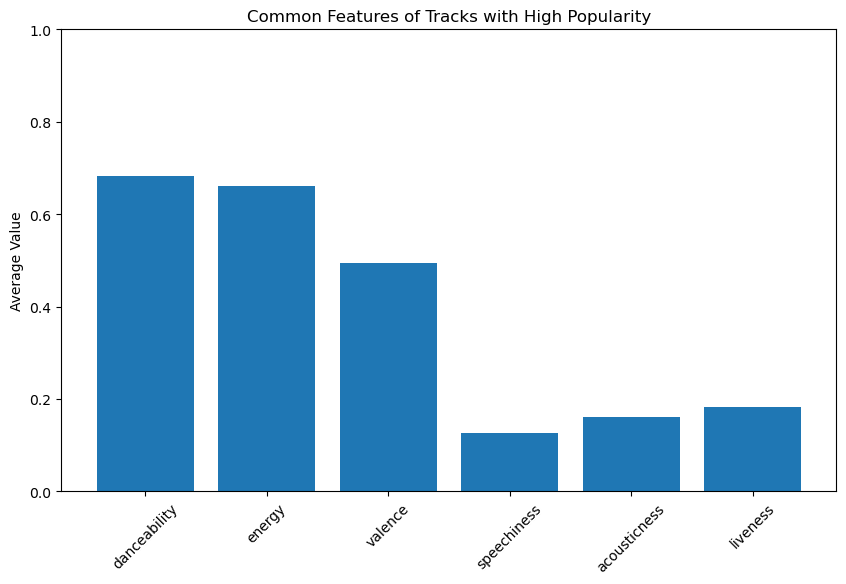

In [105]:
# Visualize the common features with a bar chart
plt.figure(figsize=(10, 6))
plt.bar(common_features.index, common_features.values)
plt.title('Common Features of Tracks with High Popularity')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Adjust if any feature has values outside 0 to 1
plt.show()

### What are the common features of tracks with high danceability?

Common features of tracks with high danceability:


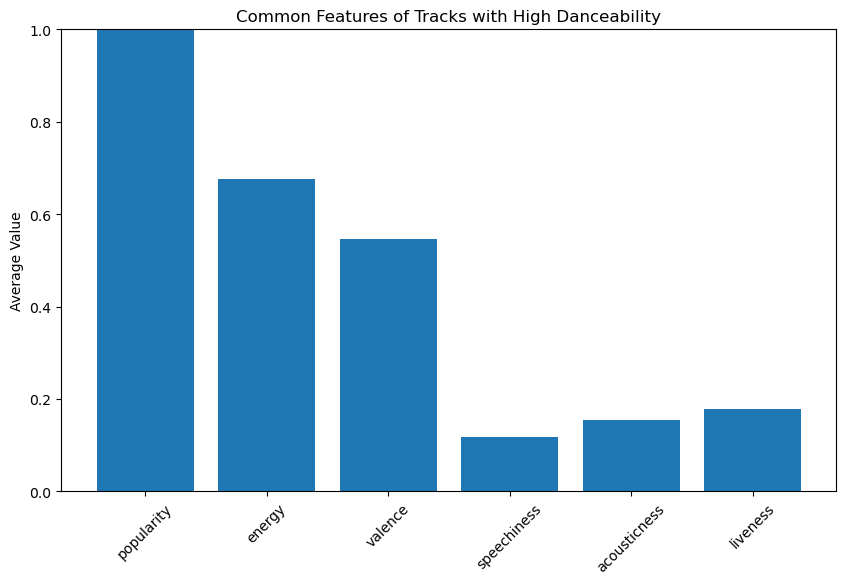

In [116]:
# Define danceability threshold for high popularity
danceability_threshold = 0.5

# Filter tracks with high danceability
high_danceability_tracks = master_data[master_data['danceability'] >= danceability_threshold]

# Select features to analyze
features = ['popularity', 'energy', 'valence', 'speechiness', 'acousticness', 'liveness']

# Calculate average values of the features for high danceability tracks
common_features = high_danceability_tracks[features].mean()

# Display the common features of tracks with high danceability
print("Common features of tracks with high danceability:")
common_features

# Visualize the common features with a bar chart
plt.figure(figsize=(10, 6))
plt.bar(common_features.index, common_features.values)
plt.title('Common Features of Tracks with High Danceability')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Adjust if any feature has values outside 0 to 1
plt.show()

### What are the common features of tracks with high valence?

Common features of tracks with high valence:


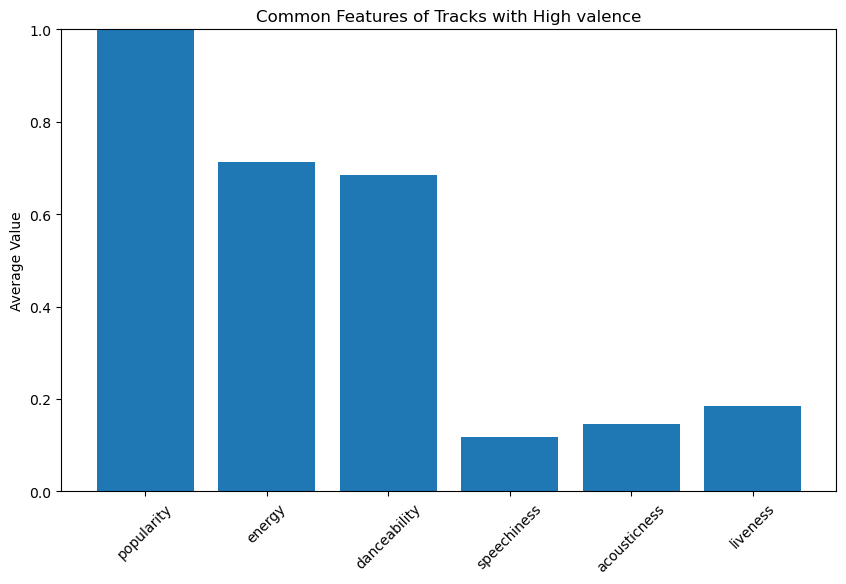

In [117]:
# Define threshold for high valence
valence_threshold = 0.4

# Filter tracks with high valence
high_valence_tracks = master_data[master_data['valence'] >= valence_threshold]

# Select features to analyze
features = ['popularity', 'energy', 'danceability', 'speechiness', 'acousticness', 'liveness']

# Calculate average values of the features for high valence tracks
common_features = high_valence_tracks[features].mean()

# Display the common features of tracks with high valence
print("Common features of tracks with high valence:")
common_features

# Visualize the common features with a bar chart
plt.figure(figsize=(10, 6))
plt.bar(common_features.index, common_features.values)
plt.title('Common Features of Tracks with High valence')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Adjust if any feature has values outside 0 to 1
plt.show()

### What's the average tempo of tracks with high popularity and danceability?

In [118]:
# Define thresholds for high popularity and high danceability
popularity_threshold = 80  # Assuming popularity is on a scale of 0-100
danceability_threshold = 0.5  # Assuming danceability is normalized between 0 and 1

# Filter tracks with high popularity and high danceability
high_popularity_danceability_tracks = master_data[
    (master_data['popularity'] >= popularity_threshold) &
    (master_data['danceability'] >= danceability_threshold)
]

# Calculate the average tempo for the filtered tracks
average_tempo = high_popularity_danceability_tracks['tempo'].mean()

# Display the average tempo
print("The average tempo of tracks with high popularity and high danceability is:", average_tempo)

The average tempo of tracks with high popularity and high danceability is: 121.28752961740142


It's not very relevant.

In [121]:
# Average tempo of tracks with high popularity: 
popularity_threshold = 80  

high_popularity_tracks = master_data[
    (master_data['popularity'] >= popularity_threshold)
]

# Calculate the average tempo for the filtered tracks
average_tempo_popularity = high_popularity_tracks['tempo'].mean()

print("The average tempo of tracks with high popularity is:", average_tempo_popularity)

The average tempo of tracks with high popularity is: 122.0446324173825


In [122]:
# Average tempo of tracks with high danceability: 
danceability_threshold = 0.5

high_danceability_tracks = master_data[
    (master_data['danceability'] >= danceability_threshold)
]

# Calculate the average tempo for the filtered tracks
average_tempo_danceability = high_danceability_tracks['tempo'].mean()

print("The average tempo of tracks with high danceability is:", average_tempo_danceability)

The average tempo of tracks with high danceability is: 119.57911258518673


### Is there a predominant mode in high popular songs? 

In [123]:
# Define popularity threshold for high popularity
popularity_threshold = 80  # Assuming popularity is on a scale of 0-100

# Filter tracks with high popularity
high_popularity_tracks = master_data[master_data['popularity'] >= popularity_threshold]

# Count the number of tracks in each mode (major or minor)
mode_counts = high_popularity_tracks['mode'].value_counts()

# Map the mode values to their respective names
mode_counts.index = mode_counts.index.map({1: 'Major', 0: 'Minor'})

# Display the counts of major and minor modes in high popular songs
print("Counts of Major and Minor Modes in High Popular Songs:", mode_counts)

Counts of Major and Minor Modes in High Popular Songs: mode
Major    36889
Minor    26324
Name: count, dtype: int64


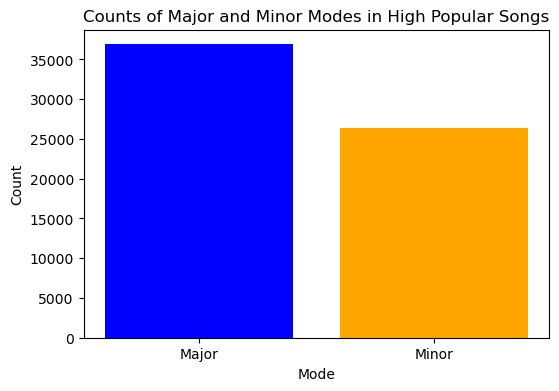

In [124]:
# Visualize the counts with a simple bar chart
plt.figure(figsize=(6, 4))
plt.bar(mode_counts.index, mode_counts.values, color=['blue', 'orange'])
plt.title('Counts of Major and Minor Modes in High Popular Songs')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.show()

### Is there a predominant mode with high danceability?

Counts of Major and Minor Modes in High Danceability Songs:
mode
Major    95680
Minor    55752
Name: count, dtype: int64


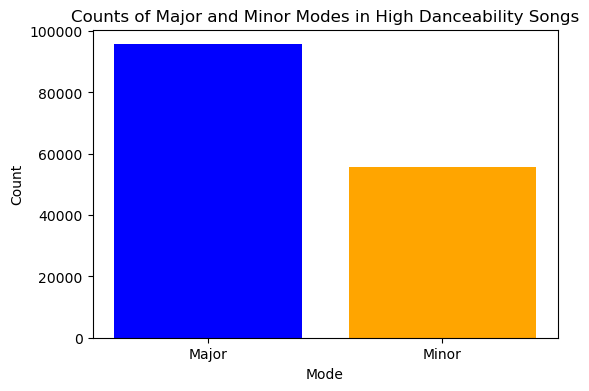

In [125]:
# Define danceability threshold for high danceability
danceability_threshold = 0.5  # Assuming danceability is normalized between 0 and 1

# Filter tracks with high danceability
high_danceability_tracks = master_data[master_data['danceability'] >= danceability_threshold]

# Count the number of tracks in each mode (major or minor)
mode_counts = high_danceability_tracks['mode'].value_counts()

# Map the mode values to their respective names
mode_counts.index = mode_counts.index.map({1: 'Major', 0: 'Minor'})

# Display the counts of major and minor modes in high danceability songs
print("Counts of Major and Minor Modes in High Danceability Songs:")
print(mode_counts)

# Visualize the counts with a simple bar chart
plt.figure(figsize=(6, 4))
plt.bar(mode_counts.index, mode_counts.values, color=['blue', 'orange'])
plt.title('Counts of Major and Minor Modes in High Danceability Songs')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.show()

### next?